<p style="text-align:center">
    <a href="https://">
    <img src="https://object-storage/afile.png" width="200" alt="Datagem Logo"  />
    </a>
</p>


## Precise Predictions: Classification for Drugs


<img src="https://drug.png" width="50%">


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to create a classifier that can classify the drugs.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Drug-Classfication">Drug Classfication</a>
        <ol>
            <li><a href="#Step-1---Load-the-data-in-a-parquet-file-into-a-dataframe">Step 1 - Load the data in a parquet file into a dataframe</a></li>
    <li><a href="#Step-2---Identify-the-target-column-and-the-data-columns">Step 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Step-3---Build-and-train-a-classifier">Step 3 - Build and train a classifier</a></li>
    <li><a href="#Step-4---Evaluate-the-model">Step 4 - Evaluate the model</a></li>        </ol>
    </li>
    

</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Use Logistic Regression to build a classifier.
 - Use metrics to evaluate the model.
 - Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

 - Drug dataset available at http://openml1.win.tue.nl/dataset43382/dataset_43382.pq
 
 


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/) for machine learning and machine-learning-pipeline related functions.
*   [`fastparquet`](https://pypi.org/project/fastparquet/) for ingesting a parquet file.
*   [`pyarrow`](https://arrow.apache.org/docs/python/index.html) for ingesting a parquet file.


### Installing Required Libraries




In [ ]:
# All Libraries required for this lab are listed below. 
%pip install -U pandas
%pip install -U scikit-learn
%pip install -U pyarrow
%pip install -U fastparquet

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [123]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Drug Classfication

### Step 1 - Load the data in a parquet file into a dataframe

In [93]:
# the data set is available at the url below.
URL = "http://openml1.win.tue.nl/dataset43382/dataset_43382.pq"
#df = pd.read_parquet(URL, engine='pyarrow')
df = pd.read_parquet(URL, engine='fastparquet')
# using the read_parquet function in the pandas library, we load the data into a dataframe.

Let's look at some sample rows from the dataset we loaded:


In [91]:
# show 5 random rows from the dataset
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
178,39,M,NORMAL,HIGH,15.969,DrugY
98,20,M,HIGH,NORMAL,35.639,DrugY
149,22,M,LOW,HIGH,8.151,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
118,32,F,HIGH,NORMAL,10.292,drugA


Let's find out the number of rows and columns in the dataset:


In [82]:
df.shape

(200, 6)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    uint8  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), object(4), uint8(1)
memory usage: 8.1+ KB


Let's plot the types and count of drug types


<Axes: xlabel='Drug'>

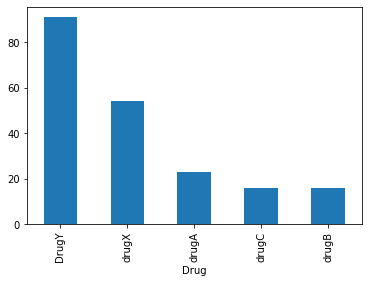

In [84]:
df.Drug.value_counts().plot.bar()

You can see that there are 5 drug types and the highest one is Drug Y. 


### Step 2 - Feature Engineering
Convert categorical features (Sex, BP, Cholesterol) into numerical representations. For example, use one-hot encoding to convert these categorical features into binary columns.
Perform one-hot encoding for categorical columns: Sex, BP, Cholesterol

In [94]:

df = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'])
df.insert(9, 'Drug', df.pop('Drug'))
df.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug
0,23,25.355,True,False,True,False,False,True,False,DrugY
1,47,13.093,False,True,False,True,False,True,False,drugC
2,47,10.114,False,True,False,True,False,True,False,drugC
3,28,7.798,True,False,False,False,True,True,False,drugX
4,61,18.043,True,False,False,True,False,True,False,DrugY


### Step 3 - Split the Data
Split the dataset into training and testing sets. Typically, you would use a larger portion for training (e.g., 80%) and a smaller portion for testing (e.g., 20%).

In [110]:
# X should contain the features (Age, one-hot encoded columns, Na_to_K)
# y should contain the target variable (Drug)
# Features (X): Age, one-hot encoded columns ('Sex', 'BP', 'Cholesterol'), Na_to_K
X = df.drop('Drug', axis=1)  # Features excluding the target variable

# Target variable (y): 'Drug'
y = df['Drug']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to verify the split
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Now you have X_train, y_train for training and X_test, y_test for testing your machine learning model.

Train set shape: (160, 9) (160,)
Test set shape: (40, 9) (40,)


### Step 4: Model Selection and Training
Choose a suitable classification model (e.g., Decision Trees, Random Forest, Logistic Regression) and train it using the training data.

Create a Logistic Regression model

In [97]:
classifier = LogisticRegression()

Train/Fit the model


In [111]:
classifier.fit(X_train, y_train)
# The model is now trained and ready for predictions.

LogisticRegression()

Make predictions. Let us predict the drug with Age = 25, Na_to_K = 8.3, Sex_F = True, Sex_M = False, BP_HIGH = False, BP_LOW = False, BP_NORMAL = True, Cholesterol_HIGH = True, Cholesterol_NORMAL = False


In [107]:
classifier.predict([[25, 8.3, 1, 0, 0, 0, 1, 1, 0]])

array(['drugX'], dtype=object)

## Step 5 - Evaluate the model


Your model is now trained. Time to evaluate the model.


In [113]:
# Optionally, you can also make predictions on the test set
y_pred = classifier.predict(X_test)

In [117]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.975
Precision: 0.9765625
Recall: 0.975
F1 Score: 0.9740143369175627
Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  4  0]
 [ 0  0  0  0 11]]


<details> 
    <summary> Click here for details </summary>

The confusion matrix provides a summary of the model's performance in a classification problem. It is a table that shows the true positive, true negative, false positive, and false negative predictions for each class.

Each row represents the true class (actual) from the test set.
Each column represents the predicted class by the model.
Here's the interpretation for each entry:

Row 1 (Drug A):

True Positives (TP): 15 (Model correctly predicted Drug A for 15 instances)
False Negatives (FN): 0 (Model incorrectly predicted a different drug for 0 instances)
Row 2 (Drug B):

True Positives (TP): 6 (Model correctly predicted Drug B for 6 instances)
False Negatives (FN): 0 (Model incorrectly predicted a different drug for 0 instances)
Row 3 (Drug C):

True Positives (TP): 3 (Model correctly predicted Drug C for 3 instances)
False Negatives (FN): 0 (Model incorrectly predicted a different drug for 0 instances)
Row 4 (Drug X):

True Positives (TP): 4 (Model correctly predicted Drug X for 4 instances)
False Negatives (FN): 1 (Model incorrectly predicted a different drug for 1 instance)
Row 5 (Drug Y):

True Positives (TP): 11 (Model correctly predicted Drug Y for 11 instances)
False Negatives (FN): 0 (Model incorrectly predicted a different drug for 0 instances)
The diagonal elements (top-left to bottom-right) represent the true positives (correct predictions for each class). The off-diagonal elements represent misclassifications. The higher the values on the diagonal, the better the model's performance for each class.
</details>





## Authors


[Toshio Sekiguchi](https://www.linkedin.com/in/toshiosekiguchi)


## Contributors



## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-18|1.0|Toshio Sekiguchi|Initial Version Created|



Copyright © 2023 Datagem LLC. All rights reserved.
